In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

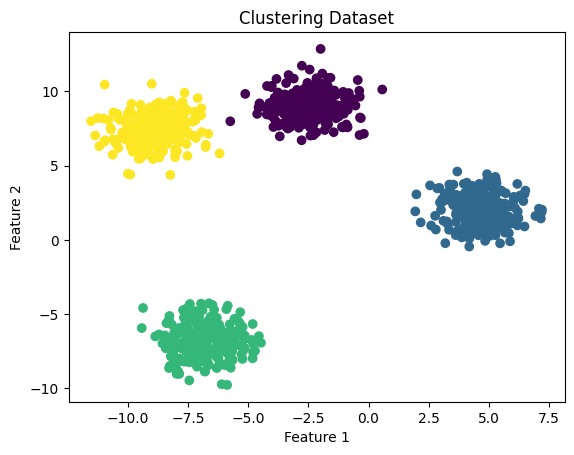

In [2]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()

In [3]:
def coreset(data, m):
    N = data.shape[0]
    
    mean = np.mean(data, axis=0)
    
    q = np.linalg.norm(data - mean, axis=1)**2
    sum = np.sum(q)
    q = 0.5 * (1.0/N + q/sum)
    
    samples = np.random.choice(N, m, p=q)
    coreset = data[samples]
    weights = 1.0 / (q[samples] * m)
    
    return coreset, weights 

In [4]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans(data, weights, k, max_iterations=15):
    data = np.asarray(data)
    
    mins = data.min(axis=0)
    maxs = data.max(axis=0)
    centroids = np.random.rand(k, data.shape[1]) * (maxs - mins) + mins
    
    for _ in range(max_iterations):
        dist = cdist(data, centroids)
        weighted_dist = dist * weights[:, np.newaxis]
        labels = np.argmin(weighted_dist, axis=1)
        
        for j in range(k):
            cluster = labels == j
            if weights[cluster].sum() > 0:
                centroids[j] = np.average(data[cluster], axis=0, weights=weights[cluster])
            else:
                centroids[j] = np.random.rand(1, data.shape[1]) * (maxs - mins) + mins
    
    return centroids


def predict(data, centroids):
    dist = cdist(data, centroids)
    labels = np.argmin(dist, axis=1)
    return labels

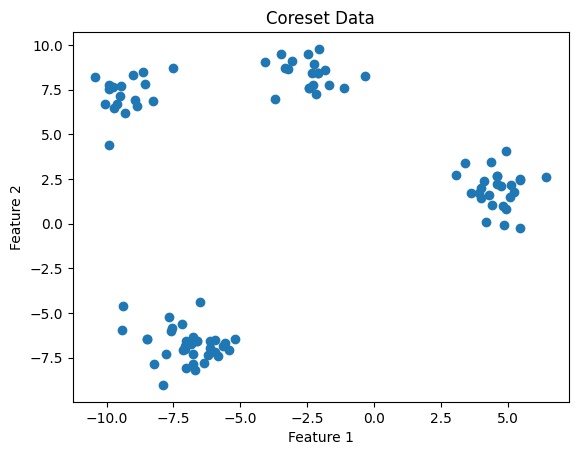

In [5]:
data_coreset, data_weights = coreset(X, 100)
plt.scatter(data_coreset[:, 0], data_coreset[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Coreset Data')
plt.show()


In [6]:
data_weights

array([ 5.82032371, 14.22000459, 11.11131142,  7.39634989,  7.34513417,
       10.89065287,  9.5677624 ,  9.57559818,  9.42935387, 12.03009674,
        7.59923499, 10.29687363,  7.41596148,  6.63699607, 14.92933546,
       16.02375148,  8.00589834,  8.66532489, 11.81611134,  7.83018959,
        7.40773202,  7.44866822, 10.18865486, 13.34642458, 10.56345676,
        8.6369649 ,  7.81972244, 10.58361637, 10.25667188,  7.02306862,
        7.63309678, 12.5950024 , 10.0237747 ,  8.21520675,  8.11163675,
       12.67265074, 10.45176022, 12.36674113, 13.49140874,  8.16147609,
       11.02944885,  8.16935414,  6.88597047, 11.34776475, 10.84500433,
       11.86225151,  7.98563131,  8.43539251, 11.32325437,  9.53425354,
        8.20230454,  7.4738292 , 12.81432141, 14.92933546, 10.50924772,
       15.35094344,  9.33787024,  7.7552592 ,  7.31706675, 10.25667188,
       12.11167106, 12.10453769, 11.95536644, 14.32378862,  6.48327781,
        9.76431427, 10.29723044, 12.69001231,  6.65768882, 10.13

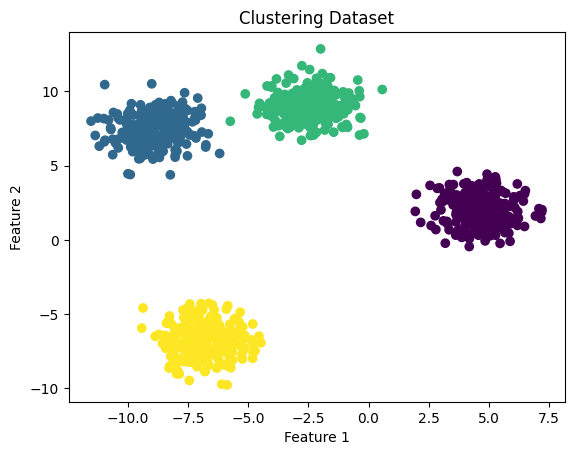

In [7]:
centroids_coreset = kmeans(data_coreset, data_weights, 4, 15)
labels_coreset = predict(X, centroids_coreset)

plt.scatter(X[:, 0], X[:, 1], c=labels_coreset)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()